In [1]:
import numpy as np
import arepo
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter
from tqdm import tqdm
import matplotlib as mpl
from scipy.stats import binned_statistic_2d
from numba import njit
import h5py as h5
import os

In [26]:
sn05 = arepo.Snapshot('lvl5/MW_ICs-beta05.dat')
sn06 = arepo.Snapshot('lvl5/MW_ICs-beta06.dat')
sn067 = arepo.Snapshot('lvl5/MW_ICs-beta067.dat')
sn07 = arepo.Snapshot('lvl5/MW_ICs-beta07.dat')

In [3]:
np.min(sn.part0.pos, axis=0)

NameError: name 'sn' is not defined

In [27]:
sn = sn07
R200 = 129
Mdm = 0.0
Mbar = 0.0
for pt in [0, 1, 2, 3]:
    part = getattr(sn, 'part'+str(pt))
    r = np.linalg.norm(part.pos, axis=1)
    key = r < R200
    
    if sn.MassTable[pt] > 0:
        Mpt = sn.MassTable[pt] * np.sum(key)
    else:
        Mpt = np.sum(part.mass[key])
    
    if pt==1:
        Mdm += Mpt
    else:
        Mbar += Mpt

print(Mbar / (Mbar+Mdm))
print(Mbar + Mdm)

0.15680088029036512
29.735609791236715


In [28]:
def gas_profile(sni, rmax=300, dr=1):
    # center = np.array([sni.BoxSize, sni.BoxSize, sni.BoxSize])/2.
    # center = np.array([300, 300, 300])
    center = np.array([0, 0, 0])

    # print(center)
    pos = sni.part0.pos - center
    r = np.linalg.norm(pos, axis=1)
    
    # print(np.min(r))
    
    rmin = 0
    
    out = {}
    out['rlist'] = []
    out['rholist'] = []
    
    while rmin < rmax:
        key = np.logical_and(r >= rmin, r < rmin + dr)
        
        Menc = np.sum(sni.part0.mass[key])
        vol = (4 * np.pi/3.) * ((rmin + dr)**3 - rmin**3)
        
        aver = np.mean(r[key])
        
        out['rlist'].append(aver)
        out['rholist'].append(Menc/vol)
        
        rmin += dr
    
    out['rlist'] = np.array(out['rlist'])
    out['rholist'] = np.array(out['rholist'])
    
    return out

In [29]:
dr = 4.0
out05 = gas_profile(sn05, dr=dr)
out06 = gas_profile(sn06, dr=dr)
out067 = gas_profile(sn067, dr=dr)
out07 = gas_profile(sn07, dr=dr)

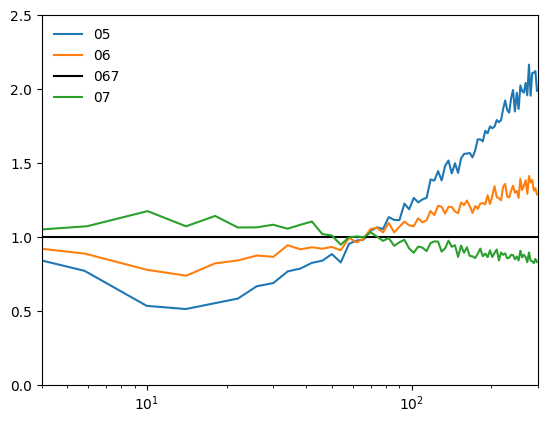

In [30]:
plt.plot(out05['rlist'], out05['rholist']/out067['rholist'], label='05')
plt.plot(out06['rlist'], out06['rholist']/out067['rholist'], label='06')
plt.plot(out067['rlist'], out067['rholist']/out067['rholist'], label='067', c='k')
plt.plot(out07['rlist'], out07['rholist']/out067['rholist'], label='07')

plt.legend(frameon=False)

plt.xlim(4, 300)
plt.ylim(0, 2.5)
plt.xscale('log')
# plt.yscale('log')

In [6]:
ic05_dens = arepo.Snapshot('lvl5-dens/MW-beta05.hdf5')
ic05 = arepo.Snapshot('lvl5/MW-beta05.hdf5')

In [7]:
sn = arepo.Snapshot('../../runs/MW5iso/lvl5-beta05/output', 0, combineFiles=True)

In [18]:
com = sn.part0.CenterOfMass
cen = sn.part0.Coordinates
diff = com - cen
rdiff = np.linalg.norm(diff, axis=1)

Rcom = np.linalg.norm(com[:,:2], axis=1)
Rcen = np.linalg.norm(cen[:,:2], axis=1)

# Rdiff = np.linalg.norm(diff[:,:2], axis=1)
# cos = diff[:,0] / Rdiff
# sin = diff[:,1] / Rdiff


vol = sn.part0.mass/sn.part0.rho
rsize = (3*vol/4/np.pi)**(1/3)

r = np.linalg.norm(sn.part0.Coordinates - 0.5*np.array([sn.BoxSize]*3), axis=1)

(0.0, 50.0)

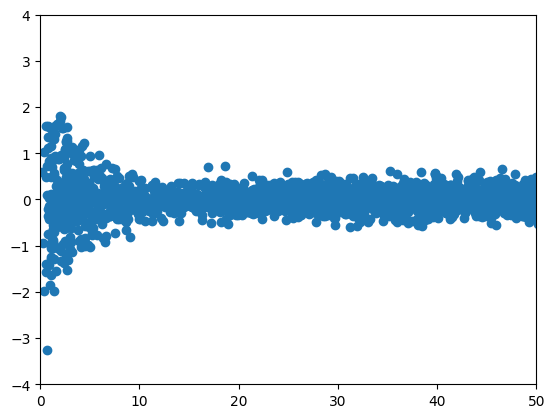

In [23]:
key = np.random.choice(np.arange(len(r)), 40000, replace=False)
# plt.scatter(r[key], (Rcom[key] - Rcen[key])/rsize[key])
plt.scatter(r[key], (com[key,2] - cen[key,2])/rsize[key])
plt.ylim(-4, 4)
plt.xlim(0, 50)

In [25]:
key = r < 10
print(np.mean((com[key,2] - cen[key,2])/rsize[key]))
print(np.std((com[key,2] - cen[key,2])/rsize[key])/np.sqrt(np.sum(key)))

-0.021539460406667314
0.011865287689947964
